In [1]:
from mu2etools import *
import pickle
import os
import hist
import matplotlib.pyplot as plt

file_path_tyler = "/exp/mu2e/data/users/thoroho/efficiency/MCv30_arr.pkl"
file_path_yuri = "/exp/mu2e/data/users/oksuzian/EAF/EfficiencyBatchV30.pkl"

In [2]:
def inspect_pickle(file_path):
    with open(file_path, "rb") as file:
        data = pickle.load(file)
    print(f"Data Type: {type(data)}")
    return data

In [3]:
ar_tyler = inspect_pickle(file_path_tyler)
ar_yuri = inspect_pickle(file_path_yuri)

Data Type: <class 'awkward.highlevel.Array'>
Data Type: <class 'awkward.highlevel.Array'>


In [4]:
cut = (ar_yuri["nTrigHits"] >= 12) & \
      (ar_yuri["trackPEs"] < 3000) & \
      (ar_yuri["trackPoints"] < 40) & \
      (ar_yuri["dataType"] == "MC30") & \
      (ar_yuri["trackChi2NDF"] < 30) & (ar_yuri["trackChi2NDF"] > 0)

ar_yuri_cut = ar_yuri[cut]  # Apply boolean mask correctly

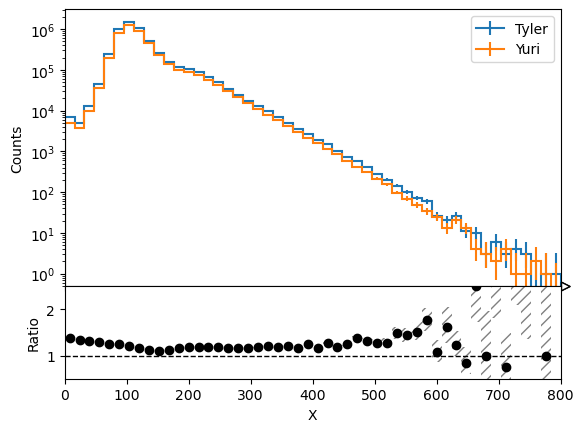

In [8]:
# Define histogram bins and range
bins, hist_range = 50, (0, 800)

# Fill histograms with data
hist_1 = hist.Hist(hist.axis.Regular(bins, *hist_range, name="X")).fill(ar_tyler["PEsTestLayer1"])
hist_2 = hist.Hist(hist.axis.Regular(bins, *hist_range, name="X")).fill(ar_yuri_cut[ar_yuri_cut["dataType"] == "MC30"]["PEsTestLayers"][:, 0])
# Plot ratio plot
hist_1.plot_ratio(hist_2, rp_ylabel="Ratio", rp_num_label="Tyler", rp_denom_label="Yuri", rp_uncert_draw_type="bar")

main_ax, ratio_ax = plt.gcf().axes
main_ax.set_yscale("log")
ratio_ax.set_ylim(0.5, 2.5)
main_ax.set_xlabel("PEsTestLayer1")
main_ax.legend();